## So this is a massive dataset containing records for over 13000 people who have been killed by police since 2013

## Lets get to work cleaning up our variables, getting everything ready for analysis, and seeing what we can find to help us better understand this data 

## We will try to learn as much as we can by performing some simple analysis, and occasionally go deeper and construct some statistical models to better understand anything that catches our eye  

## Have you ever wondered about the circumstances behind police killings in the US or ever questioned that what the media telling you about this killings is accurate and free of bias?

## Lets find out

In [1]:
#import packages 
import numpy as np
import pandas as pd
import math
import io
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import os
import re
import statsmodels.api as sm

In [2]:
#set default plot format 
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('/kaggle/input/dataset-on-us-police-killings-2013-2024/MPVDatasetDownload.xlsx')

In [4]:
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Officer Prosecuted by (Chief Prosecutor),Prosecutor Race,Prosecutor Gender,Chief Prosecutor Political Party,Chief Prosecutor Term,Officer Prosecuted by (Prosecutor in Court),Special Prosecutor?,Independent Investigation?,Prosecutor Source Link,Killed by Police 2013-24
0,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-10,3400 Sixth St,Ceres,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Nicholas Pierce,43,Male,Unknown race,NaN,2024-05-10,4700 Crawford Ave,Louisville,KY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Name withheld by police,Unknown,Male,Unknown race,NaN,2024-05-10,Market St and S 14th St,St. Louis,MO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,"Freeman Sherman, Jr.",39,Male,Black,NaN,2024-05-10,3000 Dumbarton Rd,Memphis,TN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Name withheld by police,16,Male,Unknown race,NaN,2024-05-10,I-35 and S 7th St,Kansas City,KS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df.shape

(12798, 64)

In [6]:
#remove all special characters in the column names 
#normally would use janitor but I cant get it to work here on kaggle
df.columns = [re.sub(r'[^\w\s]', '', col) for col in df.columns]

In [7]:
#remove all spaces in the columns and replace with _
#these spaces will cause major headaches, so best to remove them early 
df.columns = [re.sub(r'[^\w\s]', '', col).replace(' ', '_') for col in df.columns]

In [8]:
# clean up the columns to remove uppercase letters
df.columns = [col.lower() for col in df.columns]

In [9]:
df.columns

Index(['victims_name', 'victims_age', 'victims_gender', 'victims_race',
       'url_of_image_of_victim', 'date_of_incident_monthdayyear',
       'street_address_of_incident', 'city', 'state', 'zipcode', 'county',
       'agency_responsible_for_death', 'ori_agency_identifier_if_available',
       'cause_of_death',
       'media_description_of_the_circumstances_surrounding_the_death',
       'official_disposition_of_death_justified_or_other', 'criminal_charges',
       'link_to_news_article_or_photo_of_official_document',
       'symptoms_of_mental_illness', 'armedunarmed_status',
       'alleged_weapon_source_wapo_and_review_of_cases_not_included_in_wapo_database',
       'alleged_threat_level_source_wapo_and_review_of_cases_not_included_in_wapo_database',
       'threat_level_description',
       'fleeing_source_wapo_and_review_of_cases_not_included_in_wapo_database',
       'body_camera_source_wapo', 'wapo_id_if_included_in_wapo_database',
       'offduty_killing',
       'geography_v

In [10]:
#rename any columns with wierd names we need 
df.rename(columns = {'fleeing_source_wapo_and_review_of_cases_not_included_in_wapo_database' : 'fleeing', 
                     'alleged_weapon_source_wapo_and_review_of_cases_not_included_in_wapo_database' : 'weapon'}, inplace = True)

## -----------------------------------------------------------------
# DEMOGRAPHICS

## -----------------------------------------------------------------

In [11]:
#what is the gender breakdown of this data? Were men more likely to be killed than women?
df['victims_gender'].value_counts().head(2)

victims_gender
Male      12114
Female      634
Name: count, dtype: int64

In [12]:
12114 / 634

19.107255520504733

## Men represent 19 times the amount of deaths than women 

<Axes: xlabel='victims_gender'>

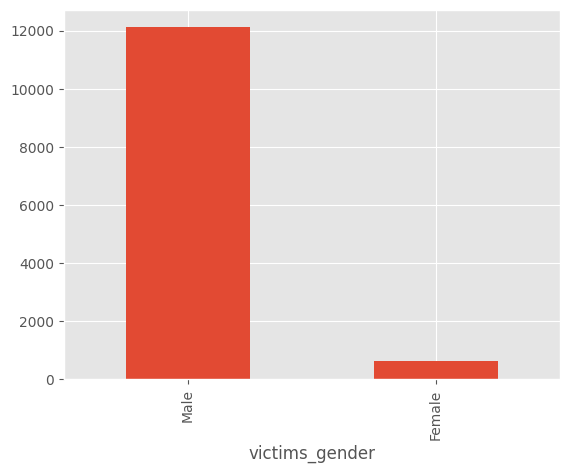

In [13]:
df['victims_gender'].value_counts().head(2).plot(kind = 'bar')

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [14]:
#lets fix the age column as well and see the distribution of these victims
df["victims_age"] = np.where(df["victims_age"] == "Unknown", np.nan, df["victims_age"])

In [15]:
df["victims_age"] = pd.to_numeric(df["victims_age"], errors='coerce')
df["victims_age"].mean()

37.07962069811167

In [16]:
df["victims_age"].describe()

count    12233.000000
mean        37.079621
std         13.009858
min          1.000000
25%         27.000000
50%         35.000000
75%         45.000000
max        107.000000
Name: victims_age, dtype: float64

In [17]:
#a min age of 1 does not seem correct, lets replace that age with the mean of the dataset
df.query('victims_age == 1')

,victims_name,victims_age,victims_gender,victims_race,url_of_image_of_victim,date_of_incident_monthdayyear,street_address_of_incident,city,state,zipcode,...,officer_prosecuted_by_chief_prosecutor,prosecutor_race,prosecutor_gender,chief_prosecutor_political_party,chief_prosecutor_term,officer_prosecuted_by_prosecutor_in_court,special_prosecutor,independent_investigation,prosecutor_source_link,killed_by_police_201324
3647,La'Mello Parker,1.0,Male,Black,https://fatalencounters.org/wp-content/uploads...,2021-05-03,I-10,Biloxi,MS,39532.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7086,Dominick Alexander Hernandez,1.0,Male,Hispanic,http://www.fatalencounters.org/wp-content/uplo...,2018-04-09,Zebu Ct,Laredo,TX,78045.0,...,Isidro Alaniz,Hispanic,Male,NaN,NaN,NaN,NaN,NaN,https://www.lmtonline.com/local/crime/article/...,1
9926,Gunner Wayne Page,1.0,Male,White,http://www.killedbypolice.net/victims/2753.jpg,2015-09-07,286 Howard Road,Puryear,TN,38251.0,...,Matthew Stowe,White,Male,NaN,NaN,NaN,no,NaN,NaN,1
12510,Dylan Samuel-Peters,1.0,Male,Black,NaN,2013-04-15,East 56th Street in the East Flatbush,New York,NY,11203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [18]:
#but first we will calculate the mean without these records 
mean_age = df.loc[df['victims_age'] != 1, 'victims_age'].mean()

In [19]:
#finally replace 
df.loc[df['victims_age'] == 1, 'victims_age'] = mean_age

In [20]:
df['victims_age'].mean()

37.091422029601766

<Axes: ylabel='Frequency'>

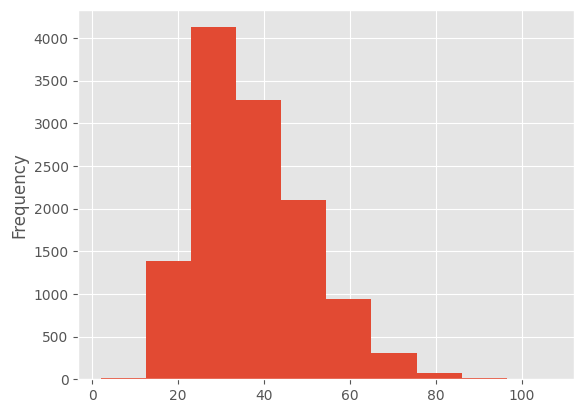

In [21]:
df['victims_age'].plot(kind = 'hist')

<Axes: xlabel='age_group'>

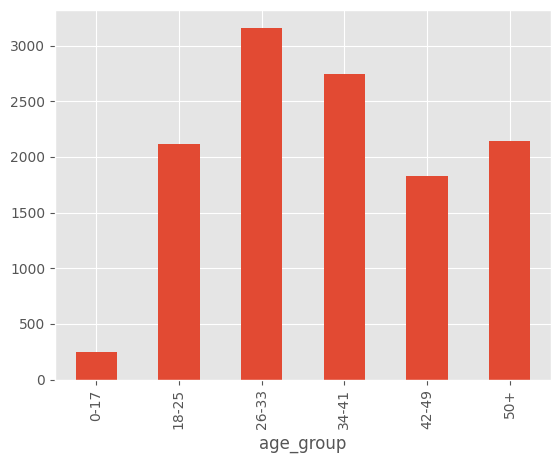

In [22]:
#lets bin the ages into groups so we can get a better idea of which age groups are most affected 
# Define the bins
bins = [0, 17, 25, 33, 41, 49, float('inf')]
# Define the labels
labels = ['0-17', '18-25', '26-33', '34-41', '42-49', '50+']

# Bin the 'victims_age' column
df['age_group'] = pd.cut(df['victims_age'], bins=bins, labels=labels)

df['age_group'].value_counts().sort_index().plot(kind = 'bar')

## So the average age of the victims is ~37, with 26-33 being the age group at highest risk 

## -----------------------------------------------------------------

## -----------------------------------------------------------------

<Axes: xlabel='victims_race'>

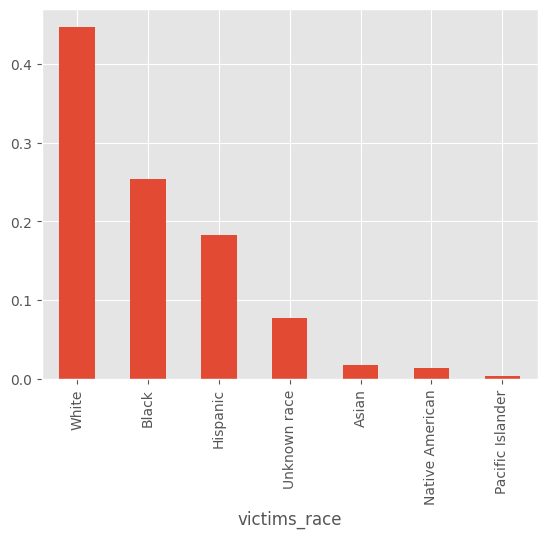

In [23]:
#what is the percentage breakdown of each race in the set?
df['victims_race'].value_counts(normalize = True).head(7).plot(kind = 'bar')

In [24]:
df['victims_race'].value_counts(normalize = True)

victims_race
White                       0.447101
Black                       0.254180
Hispanic                    0.182607
Unknown race                0.077043
Asian                       0.018050
Native American             0.013908
Pacific Islander            0.003907
Black;Hispanic              0.002657
Native American;Hispanic    0.000547
Name: proportion, dtype: float64

## Above is the race breakdown. Keep in mind that although whites make up a majority of the victims, this is may not be proportionate to their representation in the overall US population or to their representation in situations dealing with police overall

## Before attempting to make conclusions on these data, we should take into consideration each races overall representation of the US population, and also their overall representation in all police interactions 

## For example, if one race is 10% of the US population, but 30% of police interactions, then this is a disparity
## Additionally, if one race is 10% of police interactions, but 30% of police killings, then this is also a disparity


## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [25]:
#lets turn the current date column into something we can use
#I want to see the trend in killings per year
df['date_of_incident_monthdayyear']

0       2024-05-10
1       2024-05-10
2       2024-05-10
3       2024-05-10
4       2024-05-10
           ...    
12793   2013-01-01
12794   2013-01-01
12795   2013-01-01
12796   2013-01-01
12797   2013-01-01
Name: date_of_incident_monthdayyear, Length: 12798, dtype: datetime64[ns]

In [26]:
df['date_of_incident_monthdayyear'].dtype

dtype('<M8[ns]')

In [27]:
#change to string so we can pull the year only 
df['date_of_incident_monthdayyear'] = df['date_of_incident_monthdayyear'].astype('str')

In [28]:
#pull the year 
df['year'] = df["date_of_incident_monthdayyear"].str[:4]

In [29]:
#change year to numeric so we can chart 
df['year'] = pd.to_numeric(df['year'])

In [30]:
df['year'].value_counts().sort_index()

year
2013    1077
2014    1039
2015    1100
2016    1065
2017    1089
2018    1139
2019    1098
2020    1160
2021    1148
2022    1203
2023    1247
2024     433
Name: count, dtype: int64

<Axes: xlabel='year'>

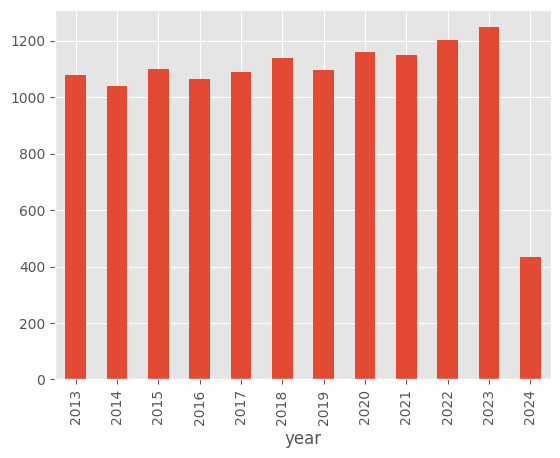

In [31]:
df['year'].value_counts().sort_index().plot(kind = 'bar')

## Looks like there is a slight upward trend year over year and that's worrying! Lets take a closer look

## We will perform a linear regression to see if there is a statistically significant upward trend overtime

In [32]:
#first exclude 2024, as this will throw off our test 
completed_years = df.query('year != 2024').copy()


In [33]:
#first lets calculate the average amount of killings per year now that we removed the incomplete 2024
completed_years['year'].value_counts().mean()

1124.090909090909

In [34]:
event_counts = completed_years['year'].value_counts().sort_index()
event_counts = event_counts.reset_index()
event_counts.columns = ['Year', 'Event_Count']

X = sm.add_constant(event_counts['Year'])
y = event_counts['Event_Count']

In [35]:
model = sm.OLS(y, X).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Event_Count   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     35.96
Date:                Thu, 30 May 2024   Prob (F-statistic):           0.000203
Time:                        18:17:42   Log-Likelihood:                -51.695
No. Observations:                  11   AIC:                             107.4
Df Residuals:                       9   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.28e+04   5656.701     -5.798      0.0

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## So we can see that our p value is 0.000, which is less than 0.05, meaning that there is a statically significant relationship between the year and the amount of killings 

## Our test results tell us that killings are increasing by an average of ~17 every year

In [37]:
#percentage increase per year based on the mean 
17 / 1124 * 100

1.5124555160142348

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [38]:
# lets pull the month too, and see if any months are higher/lower than others 
# are there less killings in December than other months?
df['month'] = df["date_of_incident_monthdayyear"].str[5:7]

df['month'] = pd.to_numeric(df['month'])

df['month']

0        5
1        5
2        5
3        5
4        5
        ..
12793    1
12794    1
12795    1
12796    1
12797    1
Name: month, Length: 12798, dtype: int64

In [39]:
df['month'].value_counts().sort_index()

month
1     1136
2     1026
3     1212
4     1116
5     1089
6     1046
7     1059
8     1109
9      931
10    1047
11     967
12    1060
Name: count, dtype: int64

<Axes: xlabel='month'>

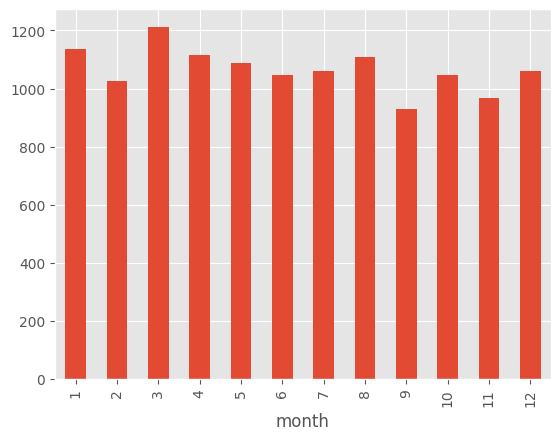

In [40]:
df['month'].value_counts().sort_index().plot(kind = 'bar')

## So very similar values for each month, seems like time of year has very little impact

## Very strange that killings are so steady throughout the year. Keep in mind these are the counts for the entire span of all years in the dataset, so it looks they they average out to be pretty similar over time.

## Our question posed at the start of this section is now answered, there sadly are not less killings in December on average

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [41]:
#what is the breakdown by state?
df['state'].value_counts()

state
CA    1834
TX    1243
FL     872
AZ     564
GA     493
CO     406
NC     364
OH     349
WA     343
MO     331
TN     330
OK     327
IL     293
PA     285
NY     267
NM     252
LA     248
AL     242
IN     234
MI     223
VA     218
KY     205
NV     203
SC     200
OR     196
WI     191
MS     187
MD     187
AR     180
UT     150
NJ     148
MN     127
KS     125
WV     114
ID      99
MA      83
MT      76
IA      74
AK      68
NE      63
ME      56
HI      56
CT      54
DC      46
SD      40
WY      39
NH      33
DE      28
ND      23
VT      18
RI      11
Name: count, dtype: int64

<Axes: xlabel='state'>

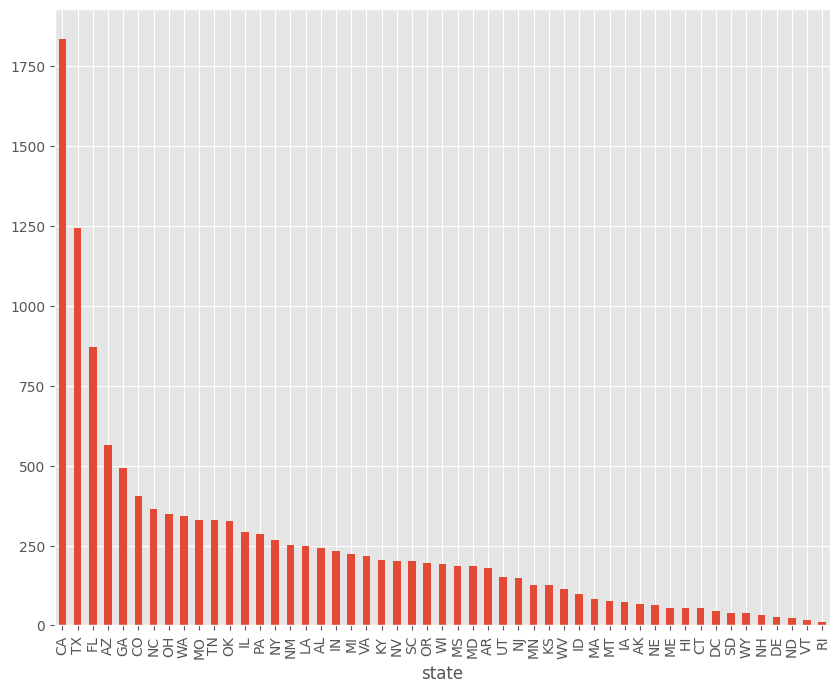

In [42]:
df['state'].value_counts().plot(kind = 'bar', figsize = (10,8))

## To get a better understanding of the broader meaning of these numbers, we need to know the population of each state. Then we can break down police killings into a metric of something like: killing per 100,000 in each state

## It would also help to know the racial demographics of each state, so we can create similar metrics based on a more refined measure and better understand the racial component of these data

## Luckily this information is included

## I may or may not include it below, or save it for another notebook with a more specific goal in mind

## -----------------------------------------------------------------
# ANALYSIS 
## -----------------------------------------------------------------

In [43]:
#As I am living in Miami, lets check killings in Miami-Dade county in FL 

In [44]:
MIAMI = df.query('county == "Miami-Dade"')
MIAMI.head(5)

,victims_name,victims_age,victims_gender,victims_race,url_of_image_of_victim,date_of_incident_monthdayyear,street_address_of_incident,city,state,zipcode,...,chief_prosecutor_political_party,chief_prosecutor_term,officer_prosecuted_by_prosecutor_in_court,special_prosecutor,independent_investigation,prosecutor_source_link,killed_by_police_201324,age_group,year,month
132,Jamal Wayne Wood,37.0,Male,Unknown race,NaN,2024-04-06,3450 NW 83rd Ave,Doral,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,34-41,2024,4
158,Leandro Francisco Ledea Chong,34.0,Male,Hispanic,https://res.cloudinary.com/graham-media-group/...,2024-03-30,462 Sunrise Blvd,Homestead,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,34-41,2024,3
382,Christopher Lynn Bailey,52.0,Male,White,https://860wacb.com/wp-content/uploads/Bailey-...,2024-01-17,Southwest 162nd Avenue and near 216th Street,Miami,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,50+,2024,1
561,Osvaldo Cueli,59.0,Male,Hispanic,NaN,2023-11-29,18000 SW 182nd St,Miami,FL,33187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,50+,2023,11
687,Daniel Allen Kempf,24.0,Male,White,NaN,2023-10-22,1298 SE 11th Pl,Homestead,FL,33035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,18-25,2023,10


In [45]:
MIAMI.shape

(118, 67)

In [46]:
MIAMI['victims_race'].value_counts()

victims_race
Hispanic          43
Black             41
White             19
Unknown race      12
Black;Hispanic     3
Name: count, dtype: int64

In [47]:
MIAMI['victims_race'].value_counts(normalize = True)

victims_race
Hispanic          0.364407
Black             0.347458
White             0.161017
Unknown race      0.101695
Black;Hispanic    0.025424
Name: proportion, dtype: float64

In [48]:
# cannot get pd.read_clipboard() to work here 

#here is the racial breakdown of Miami, FL: 

#Historical racial composition	2020[1]	2010[8]	2000[7]	1990[6]	1980[5]
#Hispanic or Latino	70.2%	70.0%	65.8%	62.5%	55.9%
#White (non-Hispanic)	14.0%	11.9%	11.8%	12.2%	19.4%
#Black or African American (non-Hispanic)	11.9%	16.3%	19.9%	24.6%	23.7%

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [49]:
df['call_for_service'].isna().sum()

5543

In [50]:
#what amount of incidents were police called to the scene?
df['call_for_service'].value_counts()

call_for_service
Yes            4681
No             2126
Unavailable     391
No               55
yes               2
Name: count, dtype: int64

In [51]:
df['call_for_service'] = df['call_for_service'].str.lower()

In [52]:
df['call_for_service'].value_counts(normalize = True) * 100

call_for_service
yes            64.548587
no             29.303928
unavailable     5.389387
no              0.758098
Name: proportion, dtype: float64

## So for the records in which we have this information, police were called to the scene ~65% of the time


## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [53]:
# lets take a look at what % of the victims were armed v unarmed
df['armedunarmed_status'].value_counts()

armedunarmed_status
Allegedly Armed                       9453
Unarmed/Did Not Have Actual Weapon    1724
Unclear                                843
Vehicle                                778
Name: count, dtype: int64

In [54]:
df['armedunarmed_status'].value_counts(normalize = True)

armedunarmed_status
Allegedly Armed                       0.738631
Unarmed/Did Not Have Actual Weapon    0.134709
Unclear                               0.065870
Vehicle                               0.060791
Name: proportion, dtype: float64

## In a majority of cases, the victim was allegedly armed 

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [55]:
#lets take a look at the fleeing column, as this is interesting. Typically people that are fleeing should not be being killed
df['fleeing'].value_counts()

fleeing
Not Fleeing    6285
Car            1724
Foot           1364
Other           218
Car, Foot        98
Not fleeing      88
car               7
foot              6
car               4
Foot, Car         2
other             2
Name: count, dtype: int64

In [56]:
#this column has some values being seperated because the first letter is uppercase
#lets fix 
df['fleeing'] = df['fleeing'].str.lower()

In [57]:
#also it looks like some extra spaces in some of the options are causeing issues 
df['fleeing'] = df['fleeing'].str.strip()

In [58]:
df['fleeing'].value_counts()

fleeing
not fleeing    6373
car            1735
foot           1370
other           220
car, foot        98
foot, car         2
Name: count, dtype: int64

In [59]:
df['fleeing'].value_counts(normalize = True )

fleeing
not fleeing    0.650439
car            0.177077
foot           0.139824
other          0.022454
car, foot      0.010002
foot, car      0.000204
Name: proportion, dtype: float64

<Axes: xlabel='fleeing'>

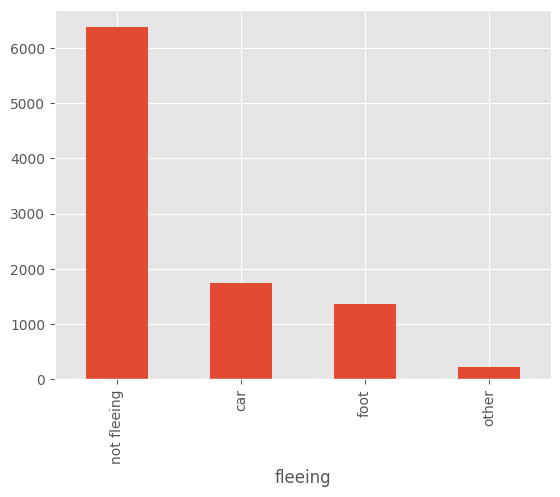

In [60]:
df['fleeing'].value_counts().head(4).plot(kind = 'bar')

In [61]:
df['fleeing'].isna().sum()

3000

## A large majority of victims were not fleeing

## Lets look into those who were fleeing by foot. Why kill someone who is running away?

In [62]:
FLEEING = df.query('fleeing == "foot"').copy()

In [63]:
FLEEING['victims_race'].value_counts()

victims_race
Black               496
White               457
Hispanic            282
Unknown race         78
Native American      26
Asian                20
Black;Hispanic        7
Pacific Islander      4
Name: count, dtype: int64

In [64]:
FLEEING['victims_race'].value_counts(normalize = True)

victims_race
Black               0.362044
White               0.333577
Hispanic            0.205839
Unknown race        0.056934
Native American     0.018978
Asian               0.014599
Black;Hispanic      0.005109
Pacific Islander    0.002920
Name: proportion, dtype: float64

In [65]:
FLEEING.query('weapon == "gun" or weapon == "knife"')['victims_race'].value_counts(normalize = True)

victims_race
Black               0.367347
White               0.341108
Hispanic            0.192420
Unknown race        0.061224
Native American     0.016521
Asian               0.013605
Pacific Islander    0.003887
Black;Hispanic      0.003887
Name: proportion, dtype: float64

In [66]:
FLEEING.query('weapon == "no object"')['victims_race'].value_counts(normalize = True)

victims_race
Black              0.421687
White              0.259036
Hispanic           0.253012
Unknown race       0.018072
Asian              0.018072
Native American    0.018072
Black;Hispanic     0.012048
Name: proportion, dtype: float64

In [67]:
FLEEING.query('weapon == "no object"')['victims_race'].value_counts().head(3)

victims_race
Black       70
White       43
Hispanic    42
Name: count, dtype: int64

## So it looks like although blacks make up 25% of the overall data, they actually make up 36% of the killed while fleeing data. 

## They were proportionatly likely to have a gun or knife while killed during fleeing

## They were by far the most likely to be killed while fleeing with no weapon, but this is a small sample size 


In [68]:
FLEEING['weapon'].value_counts()

weapon
gun                   884
no object             166
knife                 145
toy weapon             46
undetermined           40
vehicle                10
unknown weapon          7
machete                 6
taser                   5
sword                   4
sharp object            4
screwdriver             4
gun, vehicle            3
rock                    3
hammer                  2
brick                   2
metal pipe              2
axe                     2
gun, knife              2
pipe                    2
shovel                  1
baseball bat            1
walking stick           1
knife, vehicle          1
metal object            1
box cutter              1
pick-axe                1
baton                   1
gun, hatchet            1
hand torch              1
Stapler                 1
gun, explosives         1
windshield wiper        1
knife, machete          1
tire iron               1
knife; screwdriver      1
box                     1
blunt object            1
grena

## A large majority of the people fleeing had a gun or knife, and could be a danger to the public 

## On a side note, killed while fleeing and the weapon listed was a stapler?? Lets take a closer look

In [69]:
pd.set_option('display.max_colwidth', None)
FLEEING.query('weapon == "Stapler"')['media_description_of_the_circumstances_surrounding_the_death']

9887    Fuller fled the area after officers responded to reports of suspicious activity, police said. When police caught up with Fuller, a deputy shot him after he raised his right hand holding what the deputy thought was a gun, according to authorities. Police later learned Fuller was holding a stapler.
Name: media_description_of_the_circumstances_surrounding_the_death, dtype: object

In [70]:
FLEEING.query('weapon == "walking stick"')['media_description_of_the_circumstances_surrounding_the_death']

5975    Police contacted Henry Lane shortly after midnight for unspecified reasons. Red Bluff Cpl. Stephen Harper shot and killed him when Lane threatened officers with a stick.
Name: media_description_of_the_circumstances_surrounding_the_death, dtype: object

In [71]:
FLEEING.query('weapon == "windshield wiper"')['media_description_of_the_circumstances_surrounding_the_death']

4876    At around 3:45 a.m., a call was made to police reporting someone destroying property and throwing rocks in the neighborhood. Police said, a man entered one home and struck an occupant on the shoulder with a metal object before fleeing. When officers arrived, the man ran away toward the MiraCosta College campus. When police contacted the man, he refused to comply with the officers and attempted to attack them with a windshield wiper. Police tasered the man, killing him.
Name: media_description_of_the_circumstances_surrounding_the_death, dtype: object

In [72]:
FLEEING.query('weapon == "box"')['media_description_of_the_circumstances_surrounding_the_death']

168    A 57-year-old Tustin man walked into a Wells Fargo branch in Fullerton wearing a mask and carrying a white box and told a teller he had a bomb, then walked out with the box and stolen money on Tuesday evening, March 26, authorities said, before police fatally shot him. He had a fax machine in the box.
Name: media_description_of_the_circumstances_surrounding_the_death, dtype: object

In [73]:
pd.set_option('display.max_colwidth', 50)

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## I am interested in reading some of the reports of what actually happened during these events. This may help us to better understand the circumstances of these events. Below I will show the media report describing 5 randomly selected records

In [74]:
df['media_description_of_the_circumstances_surrounding_the_death']

0        A news release Friday said officers were dispa...
1        Police were called out to Crawford Avenue just...
2        According to SLMPD’s preliminary findings, an ...
3        Memphis Police officers responded to a domesti...
4        A KCKPD officer arrived and observed three peo...
                               ...                        
12793    Omaha Police Department responded to a 911 dom...
12794    Officers responded to reports of gunshots at a...
12795    Christopher was with two others in a car. Pueb...
12796    Deputies responded to a 911 call of shots fire...
12797    Former combat medic Layton was found unconscio...
Name: media_description_of_the_circumstances_surrounding_the_death, Length: 12798, dtype: object

In [75]:
#lets expand the column so we can read everything inside 
pd.set_option('display.max_colwidth', None)

# Now when you display the DataFrame, it will show the entire text of the 'summary' column
print(df[['media_description_of_the_circumstances_surrounding_the_death']].sample(5))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           media_description_of_the_circumstances_surrounding_the_death
11632                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [76]:
pd.set_option('display.max_colwidth', 50)

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## The encounter type column gives us some information on why police were called to the scene in the first place, this will help us understand more context of the situations 

In [77]:
df['encounter_type'].value_counts()

encounter_type
Part 1 Violent Crime                                2123
Other Non-Violent Offense                           1519
Mental Health/Welfare Check                          818
Domestic Disturbance                                 789
None/Unknown                                         647
Traffic Stop                                         642
Person with a Weapon                                 576
Other Crimes Against People                          311
Part 1 Violent Crime/Domestic Disturbance            268
Other Crimes Against People/Domestic Disturbance     147
Traffic stop                                         131
Traffic Stop/Other Non-Violent Offense               129
Part 1 Violent Crime/Domestic disturbance             73
Person with a weapon                                  62
Part 1 Violent Crime/Traffic Stop                     50
Person with a Weapon/Mental Health/Welfare Check      45
Domestic disturbance                                  39
Part 1 Violent C

In [78]:
df['encounter_type'].value_counts(normalize = True).head(5)

encounter_type
Part 1 Violent Crime           0.249266
Other Non-Violent Offense      0.178349
Mental Health/Welfare Check    0.096043
Domestic Disturbance           0.092638
None/Unknown                   0.075966
Name: proportion, dtype: float64

In [79]:
#lets clean up this column so we can actually use it for analysis 
df['encounter_type'] = df['encounter_type'].str.split(pat = '/').str[0]

In [80]:
df['encounter_type'] = df['encounter_type'].str.lower()

In [81]:
df['encounter_type'].value_counts()

encounter_type
part 1 violent crime           2557
other non-violent offense      1524
traffic stop                    933
mental health                   835
domestic disturbance            829
person with a weapon            724
none                            647
other crimes against people     462
mental heatlh                     3
other non-violenr offense         1
part1 violent crime               1
part 1 violent crime              1
Name: count, dtype: int64

## Seems like a majority of the killings occured because a serious crime was taking place


## According to the FBI's Uniform Crime Report (UCR), violent crimes are offenses that involve force or threat of force. The four violent crimes in the UCR Program are:
## Murder: The unlawful killing of one person by another
## Nonnegligent manslaughter: A violent crime
## Forcible rape: The carnal knowledge of a female forcibly and against her will
## Robbery: The unlawful taking or attempted taking of property that is in the possession of another, by force or the threat of force 
## Other Part 1 crimes include: aggravated assault, burglary, larceny, motor vehicle theft, arson, and human trafficking.

In [82]:
#what about the mental health checks? Why are mental health checks such a large portion of the data?
MENTAL = df.query('encounter_type == "mental health"')

In [83]:
MENTAL['victims_race'].value_counts()

victims_race
White                       461
Black                       134
Hispanic                    120
Unknown race                 85
Asian                        20
Native American              11
Pacific Islander              2
Native American;Hispanic      1
Black;Hispanic                1
Name: count, dtype: int64

In [84]:
MENTAL['victims_race'].value_counts(normalize = True)

victims_race
White                       0.552096
Black                       0.160479
Hispanic                    0.143713
Unknown race                0.101796
Asian                       0.023952
Native American             0.013174
Pacific Islander            0.002395
Native American;Hispanic    0.001198
Black;Hispanic              0.001198
Name: proportion, dtype: float64

In [85]:
MENTAL['weapon'].value_counts().head(5)

weapon
gun             380
knife           180
no object       112
toy weapon       33
undetermined     20
Name: count, dtype: int64

## -----------------------------------------------------------------

## -----------------------------------------------------------------

In [86]:
#how are these killings being done?
#what is the prevalence of causes such as police choking people to death?
df['cause_of_death'].value_counts().head(15)

cause_of_death
Gunshot                      11866
Taser                          342
Gunshot, Taser                 302
Vehicle                         88
Physical Restraint              64
Beaten                          38
Taser, Gunshot                  15
Taser, Physical Restraint       10
Physical restraint               9
Asphyxiated                      9
Other                            8
Gunshot, Vehicle                 7
Gunshot, Police Dog              5
Pepper Spray                     5
Gunshot, Pepper Spray            4
Name: count, dtype: int64

In [87]:
df['cause_of_death'] = df['cause_of_death'].str.split(pat = ",").str[0]

In [88]:
df['cause_of_death'] = df['cause_of_death'].str.lower()

In [89]:
df['cause_of_death'].value_counts().head(15)

cause_of_death
gunshot               12192
taser                   373
vehicle                  89
physical restraint       75
beaten                   39
asphyxiated               9
other                     8
pepper spray              6
bean bag                  2
gunshot                   1
police dog                1
taser                     1
bomb                      1
baton                     1
Name: count, dtype: int64

In [90]:
#what % of killing were due to physical restraint / asphyxiated / beaten
physical_killings = 75+9+39 
physical_killings / df['cause_of_death'].value_counts().sum() 

0.009610876699484294

## Less than 1% of the killings were due to physical restraint / asphyxiated / beaten

In [91]:
df.query('cause_of_death == "physical restraint" and victims_name == "Eric Garner"')

,victims_name,victims_age,victims_gender,victims_race,url_of_image_of_victim,date_of_incident_monthdayyear,street_address_of_incident,city,state,zipcode,...,chief_prosecutor_political_party,chief_prosecutor_term,officer_prosecuted_by_prosecutor_in_court,special_prosecutor,independent_investigation,prosecutor_source_link,killed_by_police_201324,age_group,year,month
11158,Eric Garner,43.0,Male,Black,http://d.ibtimes.co.uk/en/full/1392076/garners...,2014-07-17,Victory Boulevard and Bay Street,New York,NY,10301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,42-49,2014,7


In [92]:
physical_killings = df.query('cause_of_death == "physical restraint" or cause_of_death == "beaten" or cause_of_death == "asphyxiated"')

In [93]:
physical_killings['victims_race'].value_counts(normalize = True)

victims_race
White               0.333333
Black               0.325203
Hispanic            0.227642
Unknown race        0.056911
Asian               0.032520
Black;Hispanic      0.008130
Pacific Islander    0.008130
Native American     0.008130
Name: proportion, dtype: float64

## Blacks and whites were equally likely to be killed by physical means

In [94]:
physical_killings['victims_age'].mean()

38.747899159663866

In [95]:
physical_killings['weapon'].value_counts(normalize = True)

weapon
no object       0.886179
knife           0.032520
undetermined    0.032520
gun             0.016260
blunt object    0.008130
sticks          0.008130
No object       0.008130
machete         0.008130
Name: proportion, dtype: float64

## ~88% of the time those killed physically did not have a weapon 

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## So what have we learned?

## Conclusions:


### Police have killed ~13000 people since 2013 
### Men are killed ~19 times more often than women
### The average age of the victims is ~37, with 26-33 being the age group at highest risk
### Within the deaths, whites make up ~44%, blacks make up ~25%, hispanics make up ~18%, and asians make up ~2%
### Police killings are increasing by ~17 each year

### Where this information is available:
### In a majority of the cases, police were called to the scene for some reason 
### In ~ 74% of the cases, the person killed was allegedy armed and in 13% they were unarmed 
### In ~ 65% of cases the person killed was not fleeing and the remaining were 
### Among those killed while fleeing, blacks represented a disproportionate amount in accordance with their representation in the overall data
### A large majority of the people fleeing were listed as having a gun or knife
### People commiting violent crimes represented a majority of the records
### Among those killed during mental health checks, whites represented a disproportionate amount in accordance with their representation in the overall data
### Less than 1% of the killings were due to being physical restrainted / asphyxiated / beaten 

## -----------------------------------------------------------------

## -----------------------------------------------------------------

## And this is the end. Thanks for checking out my analysis